## Recreating figure S8 in Joyce et al. 2021 GRL

### Procedure
- Use the dynamic atmospheric transport control data for Point Barrow (where eveything is variable). File names indicate which.
- Aggregate data in yearly files into a pandas dataframe
- Calculate monthly means
- Read in Point Barrow observations data
- Plot simulated vs observed CO2
- Apply ccgcrv to observed and simulations to get a fit to seasonal CO2
- Calculate CO2 seasonal amplitude changes and plot

In [1]:
%reset -f 

In [2]:
# Using conda enviroment: base 
import pandas as pd
import os
import glob
import sys

In [3]:
# Files with output for constant atmopsheric transport
files = sorted(glob.glob(os.path.realpath("../../../Data/Joyce_et_al_2021_GRL/BRW_station_co2_atmos_const*")))

# # Files with output for dynamic atmopsheric transport
# files = glob.glob(os.path.realpath("../../../Data/Joyce_et_al_2021_GRL/BRW_station_co2_atmos_vary*"))

# print(files)

In [4]:
for i in range(0, len(files)):
    f = files[i]
    # print(f)
    data_in = pd.read_csv(f, delim_whitespace=True, header=None, skiprows=3)
    if i == 0:
        colnames = pd.read_csv(f, sep=',', skiprows=2, nrows=0, skipinitialspace=True).columns.tolist()
        data_in.columns = colnames
        data = data_in  
    else:
        data_in.columns = colnames
        data = pd.concat([data, data_in])


### Fitting the ccgcrv function to the CO2 time series


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ccgcrv_python import ccg_filter

In [6]:
pre_co2 = data["Background"] + data["FF"] + data["Ocean"]
co2 = pre_co2 + data["NEE_ctrl"] + data["FIRE_ctrl"]
co2_df = pd.concat([data["Dec_year"], co2], axis=1).reset_index(drop=True)
co2_df.columns = ["decimal_year", "co2_ppm"]

# co2 = data[["Dec_year", "]] 

' \n# Seasonal Cycle\n# x and y are original data points\ntrend = filt.getTrendValue(x)\ndetrend = y - trend\nharmonics = filt.getHarmonicValue(x0)\nsmooth_cycle = harmonics + filt.smooth - filt.trend\n# residuals from the function\nresid_from_func = filt.resid\n# smoothed residuals\nresid_smooth = filt.smooth\n# trend of residuals\nresid_trend = filt.trend\n# residuals about the smoothed line\nresid_from_smooth = filt.yp - filt.getSmoothValue(x)\n# equally spaced interpolated data with function removed\nx1 = filt.xinterp\ny9 = filt.yinterp\n '

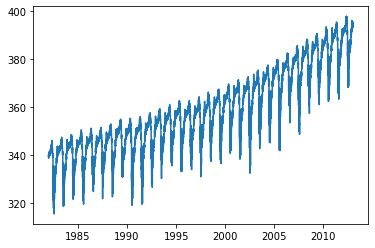

In [9]:
xp = co2_df["decimal_year"].to_numpy()
yp = co2_df["co2_ppm"].to_numpy()

shortterm = 80
longterm = 667
sampleinterval = 30
numpolyterms=3
numharmonics=4
timezero=-1
gap=0
use_gain_factor=False,
use_gain_factor=False,
debug=False

# create the ccgfilt object
filt = ccg_filter.ccgFilter(xp=xp, yp=yp, shortterm=shortterm, longterm=longterm,
    sampleinterval=sampleinterval, numpolyterms=numpolyterms,
    numharmonics=numharmonics, timezero=timezero, gap=gap, debug=debug)
#
mm = filt.getMonthlyMeans()
amps = filt.getAmplitudes()
tcup, tcdown = filt.getTrendCrossingDates()

# get x,y data for plotting
x0 = filt.xinterp
y1 = filt.getFunctionValue(x0)
y2 = filt.getPolyValue(x0)
y3 = filt.getSmoothValue(x0)
y4 = filt.getTrendValue(x0)

# plt.plot(x0, y1)
plt.plot(xp, yp)


""" 
# Seasonal Cycle
# x and y are original data points
trend = filt.getTrendValue(x)
detrend = y - trend
harmonics = filt.getHarmonicValue(x0)
smooth_cycle = harmonics + filt.smooth - filt.trend
# residuals from the function
resid_from_func = filt.resid
# smoothed residuals
resid_smooth = filt.smooth
# trend of residuals
resid_trend = filt.trend
# residuals about the smoothed line
resid_from_smooth = filt.yp - filt.getSmoothValue(x)
# equally spaced interpolated data with function removed
x1 = filt.xinterp
y9 = filt.yinterp
 """
